In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("tmp/full_stg_extract_2024-11-30_cleaned.csv")

In [65]:
# Primero realizamos una limpieza de valores que no tienen sentido o
# no nos servirían para la porción de Machine Learning

# El precio tiene que ser mayor a 0 obligatoriamente
print("Registros antes de borrar los precios menores a 1000: ", len(df))
df = df[df["price"] > 1000]
print("Registros después de borrar los precios menores a 1000: ", len(df))

# El área total debe ser mayor a 0 obligatoriamente
print("Registros antes de borrar las superficies menores a 10: ", len(df))
df = df[df["total_area"] > 10]
print("Registros después de borrar las superficies menores a 10: ", len(df))

Registros antes de borrar los precios menores a 1000:  18873
Registros después de borrar los precios menores a 1000:  18450
Registros antes de borrar las superficies menores a 10:  18450
Registros después de borrar las superficies menores a 10:  18421


<Axes: xlabel='price', ylabel='Density'>

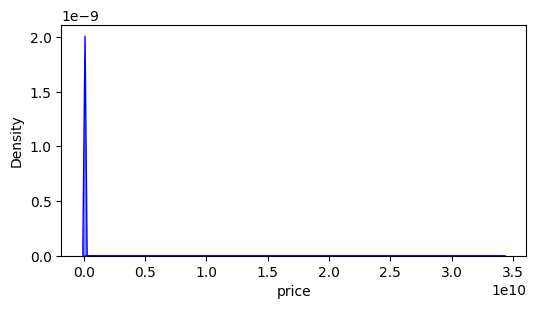

In [66]:
plt.figure(figsize=(6, 3))
sns.kdeplot(data=df, x='price', fill=True, color='blue', label='Price', alpha=0.5)

In [67]:
# Vemos que el precio tiene una distribución asimétrica a la derecha
# Vamos a ahora quitar los outliers en relacion al precio

# Calculamos los cuantiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculamos los límites a partir de los cuantiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Linea de borrado mínima': {lower_bound}")
print(f"Linea de borrado máxima': {upper_bound}")

# identificamos los outliers y luego los borramos
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nSe detectó la siguiente cantidad de outliers: {outliers.shape[0]}")

# Remove outliers from the DataFrame
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("\nNueva cantidad de datos luego de borrado:")
print(df.shape)

Linea de borrado mínima': -200000.0
Linea de borrado máxima': 1400000.0

Se detectó la siguiente cantidad de outliers: 2142

Nueva cantidad de datos luego de borrado:
(16279, 8)


<Axes: xlabel='price', ylabel='Density'>

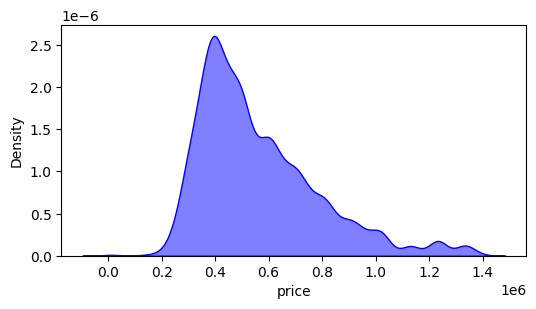

In [68]:
plt.figure(figsize=(6, 3))
sns.kdeplot(data=df, x='price', fill=True, color='blue', label='Price', alpha=0.5)

<Axes: xlabel='total_area', ylabel='Density'>

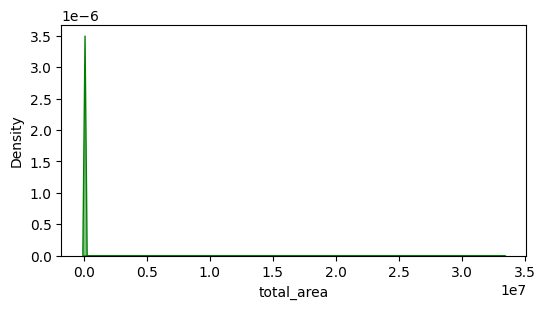

In [69]:
# Veamos ahora distribuciones para superficies
plt.figure(figsize=(6, 3))
sns.kdeplot(data=df, x='total_area', fill=True, color='green', label='Total Area', alpha=0.5)

In [70]:
# Tenemos un problema similar con la superficie total. Tomamos un approach similar

# Vemos que el precio tiene una distribución asimétrica a la derecha
# Vamos a ahora quitar los outliers en relacion al precio

# Calculamos los cuantiles
Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
IQR = Q3 - Q1

# Calculamos los límites a partir de los cuantiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Linea de borrado mínima': {lower_bound}")
print(f"Linea de borrado máxima': {upper_bound}")

# identificamos los outliers y luego los borramos
outliers = df[(df['total_area'] < lower_bound) | (df['total_area'] > upper_bound)]
print(f"\nSe detectó la siguiente cantidad de outliers: {outliers.shape[0]}")

# Remove outliers from the DataFrame
df = df[(df['total_area'] >= lower_bound) & (df['total_area'] <= upper_bound)]

print("\nNueva cantidad de datos luego de borrado:")
print(df.shape)

Linea de borrado mínima': 0.5
Linea de borrado máxima': 92.5

Se detectó la siguiente cantidad de outliers: 1070

Nueva cantidad de datos luego de borrado:
(15209, 8)


<Axes: xlabel='total_area', ylabel='Density'>

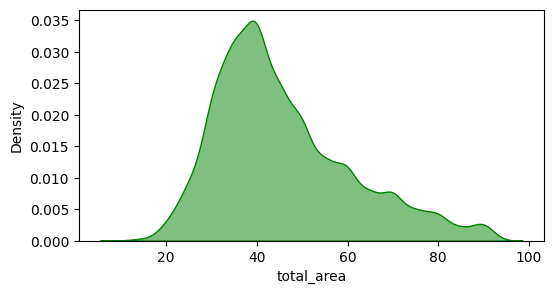

In [71]:
# Veamos ahora distribuciones para superficies
plt.figure(figsize=(6, 3))
sns.kdeplot(data=df, x='total_area', fill=True, color='green', label='Total Area', alpha=0.5)

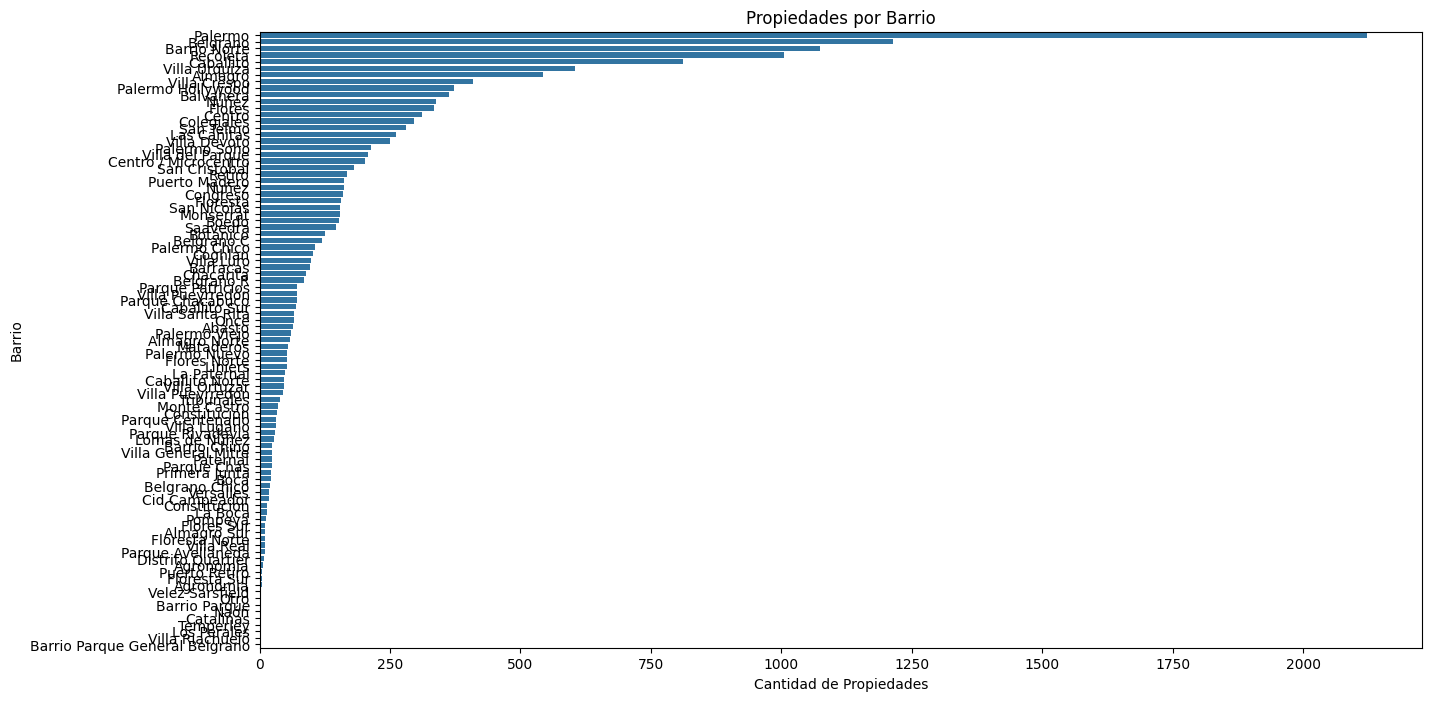

In [72]:
# Vemos distribuciones por provincia
plt.figure(figsize=(15, 8))
sns.countplot(y='neighborhood', data=df, order=df['neighborhood'].value_counts().index)
plt.title('Propiedades por Barrio')
plt.xlabel('Cantidad de Propiedades')
plt.ylabel('Barrio')
plt.show()

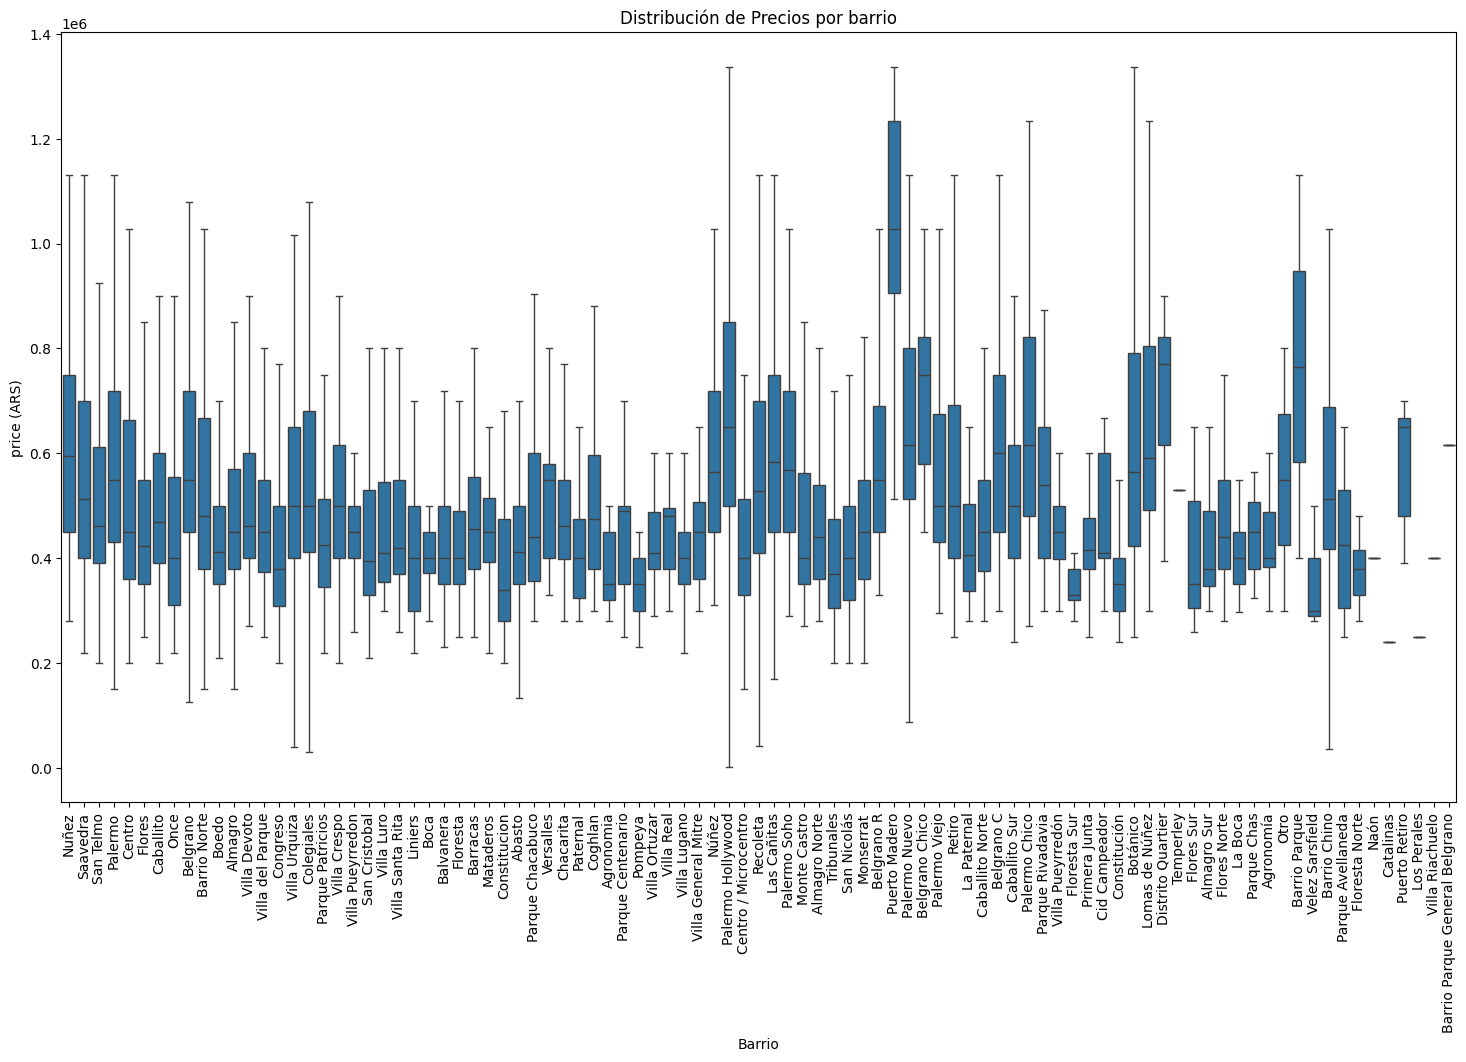

In [73]:
# Distribución de precios de las propiedades por cada Barrio
plt.figure(figsize=(18, 10))
sns.boxplot(x='neighborhood', y='price', data=df, showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribución de Precios por barrio')
plt.xlabel('Barrio')
plt.ylabel('price (ARS)')
plt.show()

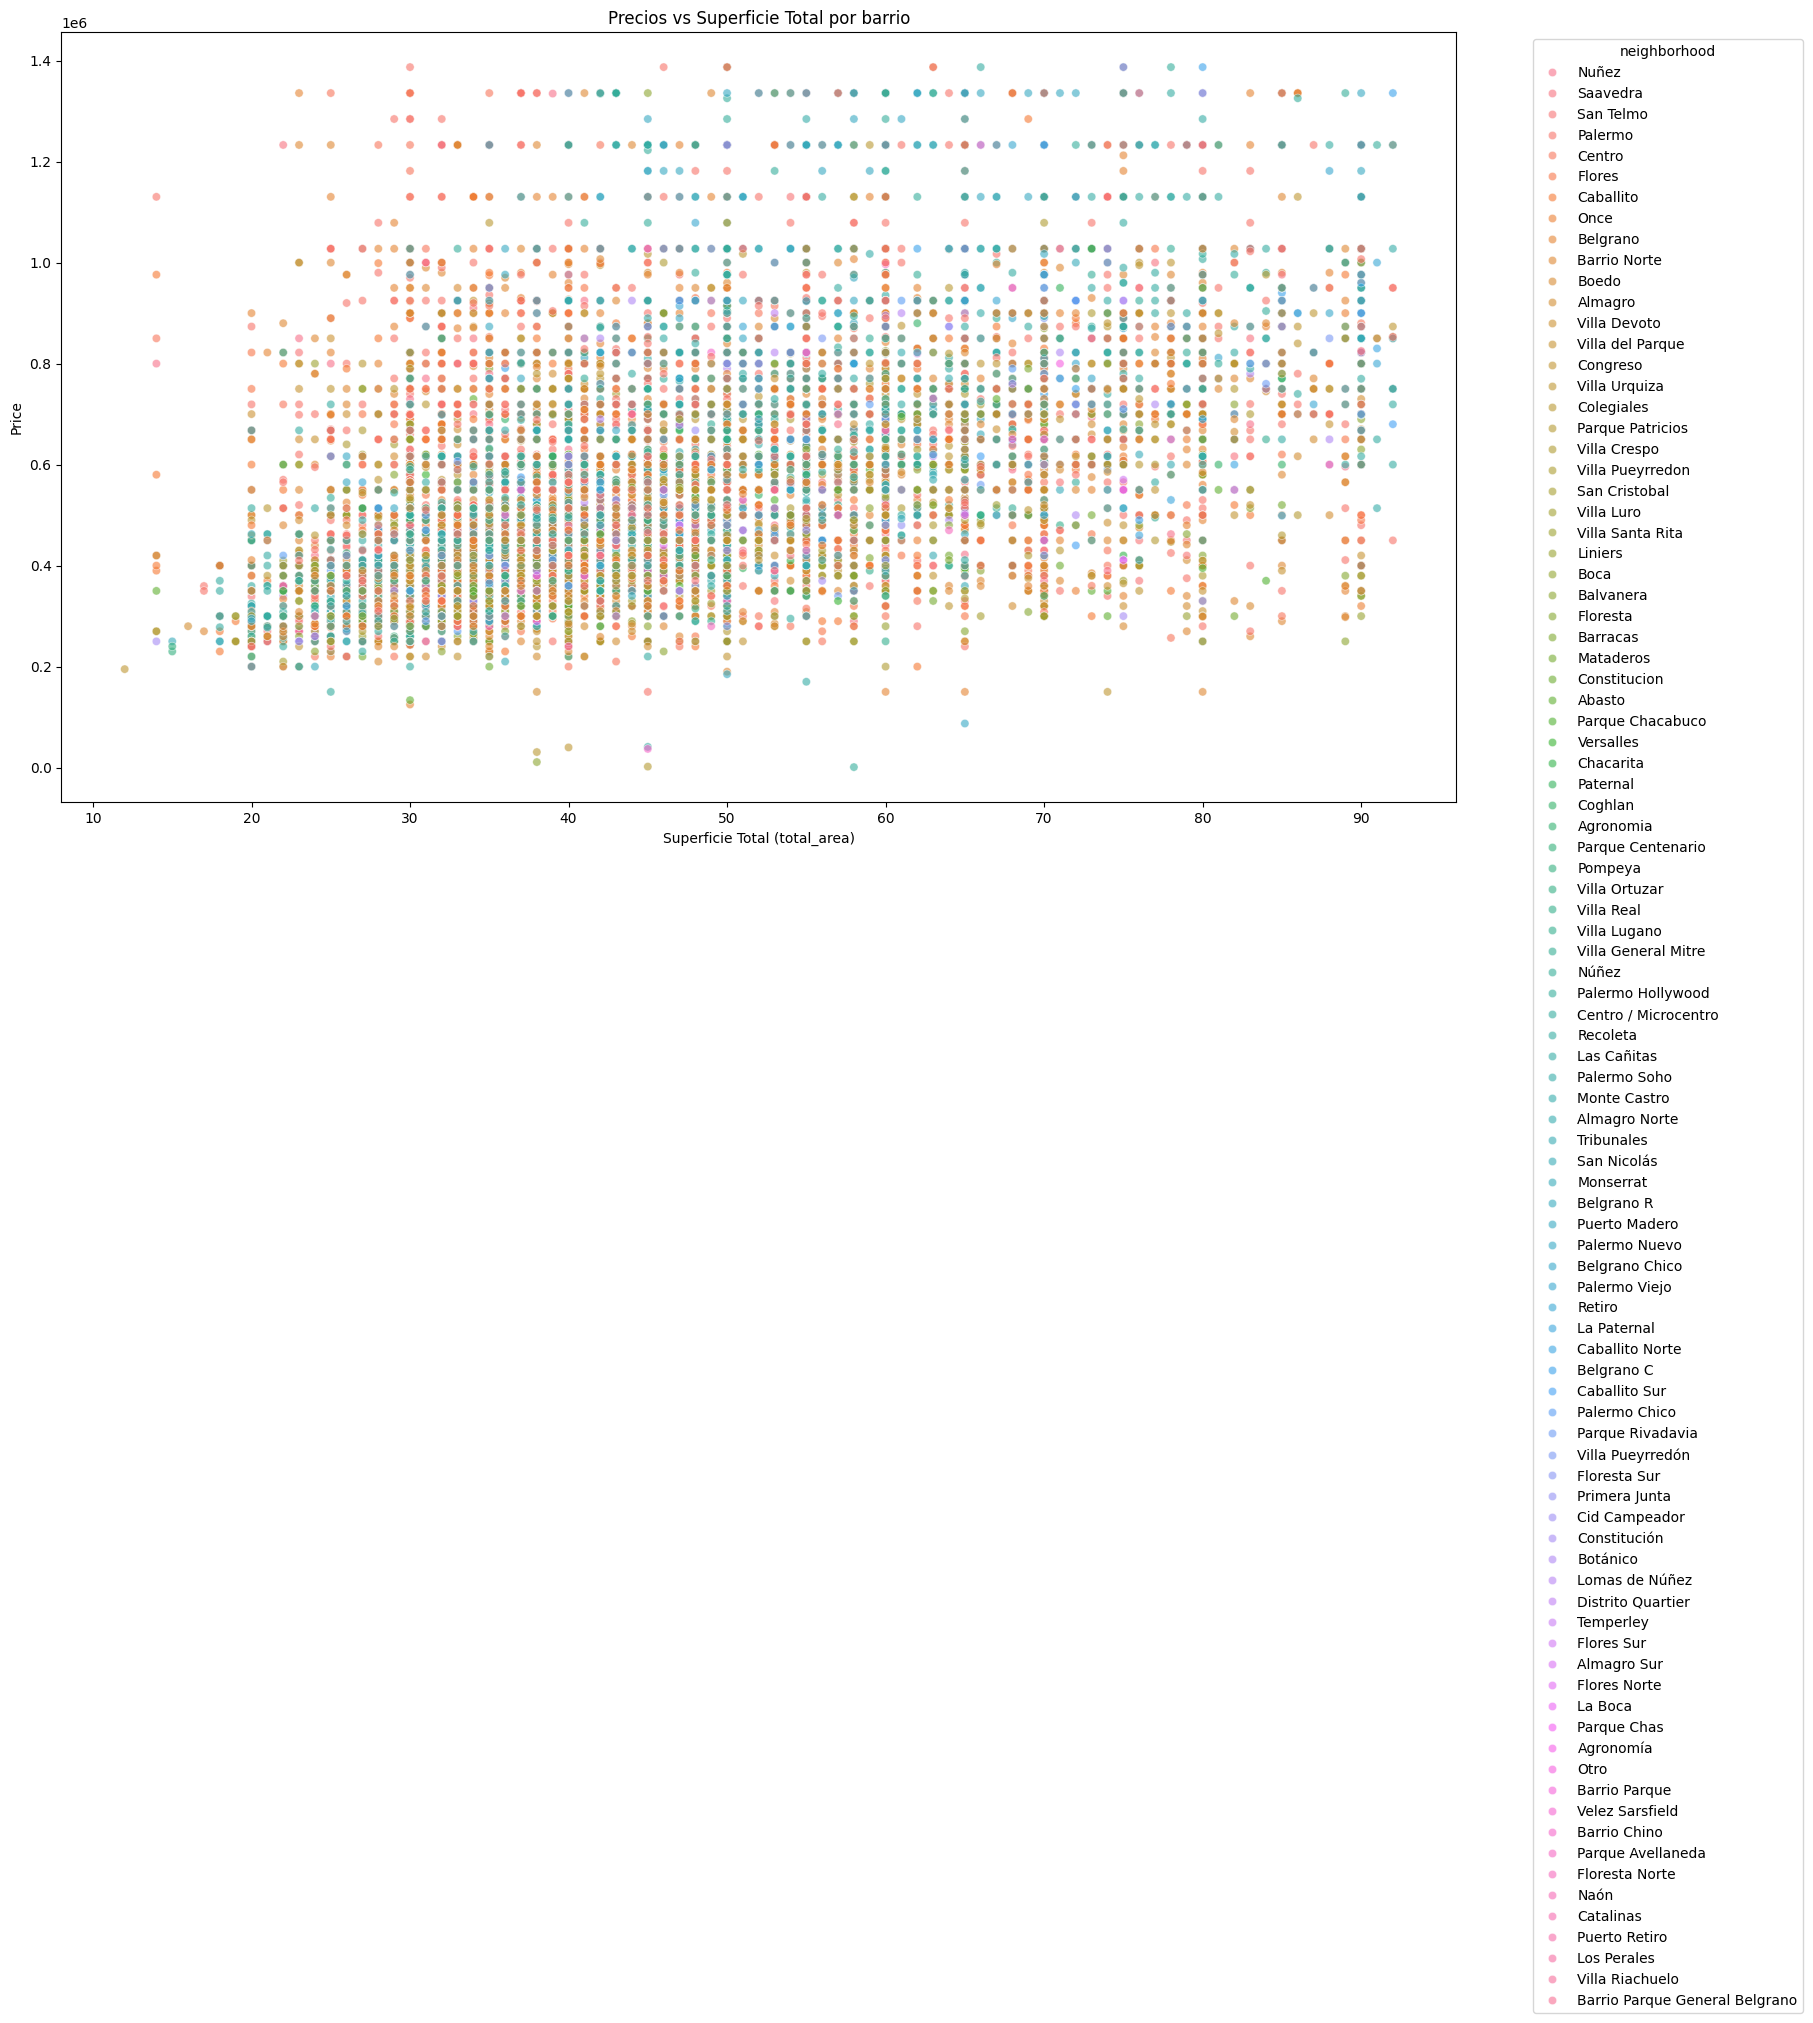

In [74]:
# Scatter por provincia de precio vs superficie total
# Poner provincia para obtener gráfica de prov particular
plt.figure(figsize=(18, 10))
sns.scatterplot(x='total_area', y='price', hue='neighborhood', data=df, alpha=0.6)
plt.title('Precios vs Superficie Total por barrio')
plt.xlabel('Superficie Total (total_area)')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='neighborhood')
plt.show()

In [75]:
# Vamos a hacer dos outputs para la porción de Machine Learning

# Output 1: Guardamos el dataset limpio
# borramos la columna de barrio
df_simple = df.drop(columns=['neighborhood'])
df_simple.to_csv("tmp/ml_ready_2024-11-30.csv", index=False)

# Output 2: Guardamos el dataset limpio con one hot encoding
df_ohe = pd.get_dummies(df, columns=['neighborhood'])
# Borramos la columna de barrio
df_ohe.to_csv("tmp/ml_ready_ohe_2024-11-30.csv", index=False)